In [1673]:
# import packages
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
import operator


%matplotlib  inline
pal = sns.set_palette(sns.cubehelix_palette(8, start=.2, rot=-.75, reverse=True))

# Data Wrangling

## Equine Death and Breakdown Dataset 

In [1588]:
# load the dataset as a dataframe
df1 = pd.read_csv('Equine_Death_and_Breakdown.csv')
print(df1.info())
#print(df1.head())
#print(df1.columns)
print('Shape:', df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 13 columns):
Year                       3240 non-null int64
Incident Date              3240 non-null object
Incident Type              3240 non-null object
Track                      3240 non-null object
Inv Location               3238 non-null object
Racing Type Description    3240 non-null object
Division                   3240 non-null object
Weather Conditions         3193 non-null object
Horse                      3240 non-null object
Trainer                    3240 non-null object
Jockey Driver              3240 non-null object
Incident Description       3240 non-null object
Death or Injury            3239 non-null object
dtypes: int64(1), object(12)
memory usage: 329.1+ KB
None
Shape: (3240, 13)


In [1589]:
# use replace() to convert all ' ' cells to null
df1 = df1.replace(' ', np.NaN)

# count how many blank cells there are in each column of type object
print('Number of blank cells in each column after replacement:')
print('Incident Type', df1.loc[df1['Incident Type'] == ' ']['Incident Type'].count())
print('Track', df1.loc[df1['Track'] == ' ']['Track'].count())
print('Inv Location', df1.loc[df1['Inv Location'] == ' ']['Inv Location'].count())
print('Racing Type Description', df1.loc[df1['Racing Type Description'] == ' ']['Racing Type Description'].count())
print('Division', df1.loc[df1['Division'] == ' ']['Division'].count())
print('Weather Conditions', df1.loc[df1['Weather Conditions'] == ' ']['Weather Conditions'].count())
print('Horse', df1.loc[df1['Horse'] == ' ']['Horse'].count())
print('Trainer', df1.loc[df1['Trainer'] == ' ']['Trainer'].count())
print('Jockey Driver', df1.loc[df1['Jockey Driver'] == ' ']['Jockey Driver'].count())
print('Incident Description', df1.loc[df1['Incident Description'] == ' ']['Incident Description'].count())
print('Death or Injury', df1.loc[df1['Death or Injury'] == ' ']['Death or Injury'].count())
print()

# check how non-null records exist for each column
df1.info()

Number of blank cells in each column after replacement:
Incident Type 0
Track 0
Inv Location 0
Racing Type Description 0
Division 0
Weather Conditions 0
Horse 0
Trainer 0
Jockey Driver 0
Incident Description 0
Death or Injury 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 13 columns):
Year                       3240 non-null int64
Incident Date              3240 non-null object
Incident Type              3240 non-null object
Track                      3240 non-null object
Inv Location               3137 non-null object
Racing Type Description    3240 non-null object
Division                   3240 non-null object
Weather Conditions         2189 non-null object
Horse                      3239 non-null object
Trainer                    3185 non-null object
Jockey Driver              2090 non-null object
Incident Description       3240 non-null object
Death or Injury            2751 non-null object
dtypes: int64(1), object(12)
memory usage

In [1590]:
# change categorical data to datatype 'category'

In [1591]:
# INCIDENT TYPE

# use groupby() to display the different incident types
# use count() to display how many records for each incident type
print(df1.groupby(['Incident Type'])['Incident Type'].count())
print()

# recategorize the on track accidents so they have the same incident type name
df1['Incident Type'] = df1['Incident Type'].replace('ON-TRACK ACCIDENT','ACCIDENT - ON TRACK')
print(df1.groupby(['Incident Type'])['Incident Type'].count())
print()

# update the datatype of 'Incident Type' to be categorical and check the datatype
df1['Incident Type'] = df1['Incident Type'].astype('category')
print('Datatype of Incident Type column:', df1['Incident Type'].dtype)

Incident Type
ACCIDENT - DRIVER/JOCKEY               10
ACCIDENT - IN STARTING GATE            22
ACCIDENT - ON TRACK                   107
ACCIDENT - TAGGED SULKY                56
DRIVER/JOCKEY INJURED                   7
EQUINE DEATH                         1234
EQUINE DEATH - INFECTIOUS DISEASE      10
FALL OF HORSE                         114
FALL OF RIDER                         211
ON-TRACK ACCIDENT                       7
RACING INJURY                         305
STEWARDS/VETS LIST                   1157
Name: Incident Type, dtype: int64

Incident Type
ACCIDENT - DRIVER/JOCKEY               10
ACCIDENT - IN STARTING GATE            22
ACCIDENT - ON TRACK                   114
ACCIDENT - TAGGED SULKY                56
DRIVER/JOCKEY INJURED                   7
EQUINE DEATH                         1234
EQUINE DEATH - INFECTIOUS DISEASE      10
FALL OF HORSE                         114
FALL OF RIDER                         211
RACING INJURY                         305
STEWARDS/VETS

In [1592]:
# TRACK NAMES, RACING TYPE DESCRIPTION, DIVISION

# check the track names
print(df1.groupby(['Track'])['Track'].count())
print()

# check racing type descriptions
print(df1.groupby(['Racing Type Description'])['Racing Type Description'].count())
print()

# check division
print(df1.groupby(['Division'])['Division'].count())
print()

# all three columns have good categorical data
# update dataype of 'Track', 'Racing Type Description', and 'Division to category
df1['Track'] = df1['Track'].astype('category')
df1['Racing Type Description'] = df1['Racing Type Description'].astype('category')
df1['Division'] = df1['Division'].astype('category')

# check datatypes of all the columns by calling the info() method
print(df1.info())

Track
Aqueduct Racetrack (NYRA)               625
Batavia Downs                            64
Belmont Park (NYRA)                     724
Buffalo Raceway                         101
Finger Lakes Gaming & Racetrack         513
Monticello Raceway & Mighty M Gaming    205
Saratoga Gaming & Raceway               402
Saratoga Racecourse (NYRA)              327
Tioga Downs                              80
Vernon Downs                             62
Yonkers Raceway                         137
Name: Track, dtype: int64

Racing Type Description
Non-Racing     317
Racing        2526
Training       377
Unknown         20
Name: Racing Type Description, dtype: int64

Division
Harness         1051
Thoroughbred    2189
Name: Division, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 13 columns):
Year                       3240 non-null int64
Incident Date              3240 non-null object
Incident Type              3240 non-null category
Track

In [1593]:
# DEATH OR INJURY

# check death or injury
print(df1.groupby(['Death or Injury'])['Death or Injury'].count())
print()

# use the replace() method to conslidate categories that are the same
df1['Death or Injury'] = df1['Death or Injury'].replace(['Death','death'],'Equine Death')
df1['Death or Injury'] = df1['Death or Injury'].replace('Lame no death','Lameness')
df1['Death or Injury'] = df1['Death or Injury'].replace('Injury','Equine Injury')
print(df1.groupby(['Death or Injury'])['Death or Injury'].count())
print()

# update the datatype of 'Death or Injury' to be categorical and check the datatype
df1['Death or Injury'] = df1['Death or Injury'].astype('category')
print('Datatype of Death or Injury column:', df1['Death or Injury'].dtype)

Death or Injury
Accident                        249
Death                             3
Equine Death                    683
Equine Injury                   101
Equine Injury / Equine Death     46
Euthanasia                      465
Injury                          220
Lame no death                     1
Lameness                        110
Steward's List                  872
death                             1
Name: Death or Injury, dtype: int64

Death or Injury
Accident                        249
Equine Death                    687
Equine Injury                   321
Equine Injury / Equine Death     46
Euthanasia                      465
Lameness                        111
Steward's List                  872
Name: Death or Injury, dtype: int64

Datatype of Death or Injury column: category


In [1594]:
# INCIDENT DATE

# update the datatype of 'Incident Date' to be a datetime object and check the datatype
df1['Incident Date'] = pd.to_datetime(df1['Incident Date'],format='%m/%d/%Y')
print('Datatype of Incident Date column:', df1['Incident Date'].dtype)

Datatype of Incident Date column: datetime64[ns]


In [1595]:
# CHECK all datatypes using the info() method
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 13 columns):
Year                       3240 non-null int64
Incident Date              3240 non-null datetime64[ns]
Incident Type              3240 non-null category
Track                      3240 non-null category
Inv Location               3137 non-null object
Racing Type Description    3240 non-null category
Division                   3240 non-null category
Weather Conditions         2189 non-null object
Horse                      3239 non-null object
Trainer                    3185 non-null object
Jockey Driver              2090 non-null object
Incident Description       3240 non-null object
Death or Injury            2751 non-null category
dtypes: category(5), datetime64[ns](1), int64(1), object(6)
memory usage: 219.8+ KB


In [1596]:
# WEATHER CONDITIONS
# create new columns with binomial (previously boolean) data

In [1597]:
# check number of unique strings
print('Number of unique weather conditions:', df1['Weather Conditions'].nunique())
print()

# display some of the more common weather condition descriptions
print('Most common weather conditions:')
print(df1['Weather Conditions'].value_counts().head(15))

Number of unique weather conditions: 808

Most common weather conditions:
Clear                          307
Cloudy                         125
Sunny                           39
Clear 50 to 55 : degrees F      34
Clear 60 to 65 : degrees F      28
clear                           27
Cloudy 50 to 55 : degrees F     24
Overcast                        22
Rain                            22
80* Clear                       20
Clear 30 to 40 : degrees F      18
Clear 45 to 50 : degrees F      18
60* Clear                       17
Clear 75 to 80 : degrees F      16
75* Clear                       16
Name: Weather Conditions, dtype: int64


In [1598]:
# create new binomial variable columns
df1['Cloudy'] = np.nan
df1['Sunny'] = np.nan
df1['Clear'] = np.nan
df1['Overcast'] = np.nan
df1['Rain'] = np.nan
df1['Snow'] = np.nan
df1['Wind'] = np.nan
df1['Thunder Storm'] = np.nan
df1['Hot'] = np.nan
df1['Humid'] = np.nan
df1['Warm'] = np.nan

# use info() to display all columns
#print(df1.info())

In [1599]:
# populate binomial weather condition columns

In [1600]:
# populate 'Cloudy' column

# create make_cloudy function
def make_cloudy(condition):
    if 'cloud' in str(condition).lower():
        return 1
    else:
        return 0

# apply make_cloudy function
df1['Cloudy'] = df1['Weather Conditions'].apply(make_cloudy)

In [1601]:
# populate 'Sunny' column

# create make_sunny function
def make_sunny(condition):
    if 'sun' in str(condition).lower():
        return 1
    else:
        return 0

# apply make_sunny function
df1['Sunny'] = df1['Weather Conditions'].apply(make_sunny)

In [1602]:
# populate 'Clear' column

# create make_clear function
def make_clear(condition):
    if 'clear' in str(condition).lower():
        return 1
    else:
        return 0

# apply make_clear function
df1['Clear'] = df1['Weather Conditions'].apply(make_clear)

In [1603]:
# populate 'Overcast' column

# create make_overcast function
def make_overcast(condition):
    if 'overcast' in str(condition).lower():
        return 1
    else:
        return 0

# apply make_overcast function
df1['Overcast'] = df1['Weather Conditions'].apply(make_overcast)

In [1604]:
# populate 'Rain' column

# create make_rain function
def make_rain(condition):
    if 'rain' in str(condition).lower():
        return 1
    else:
        return 0
    
# apply make_rain function
df1['Rain'] = df1['Weather Conditions'].apply(make_rain)

In [1605]:
# populate 'Snow' column

# create make_snow function
def make_snow(condition):
    if 'snow' in str(condition).lower():
        return 1
    else:
        return 0
    
# apply make_snow function
df1['Snow'] = df1['Weather Conditions'].apply(make_snow)

In [1606]:
# populate 'Wind' column

# create make_wind function
def make_wind(condition):
    if 'wind' in str(condition).lower():
        return 1
    else:
        return 0
    
# apply make_wind function
df1['Wind'] = df1['Weather Conditions'].apply(make_wind)

In [1607]:
# populate 'Thunder Storm' column

# create make_thunder function
def make_thunder(condition):
    if 'thunder' in str(condition).lower():
        return 1
    else:
        return 0
    
# apply make_thunder function
df1['Thunder Storm'] = df1['Weather Conditions'].apply(make_thunder)

In [1608]:
# populate 'Hot' column

# create make_hot function
def make_hot(condition):
    if 'hot' in str(condition).lower():
        return 1
    else:
        return 0
    
# apply make_hot function
df1['Hot'] = df1['Weather Conditions'].apply(make_hot)

In [1609]:
# populate 'Humid' column

# create make_humid function
def make_humid(condition):
    if 'humid' in str(condition).lower():
        return 1
    else:
        return 0
    
# apply make_humid function
df1['Humid'] = df1['Weather Conditions'].apply(make_humid)

In [1610]:
# populate 'Warm' column

#create make_warm function
def make_warm(condition):
    if 'warm' in str(condition).lower():
        return 1
    else:
        return 0
    
# apply make_warm function
df1['Warm'] = df1['Weather Conditions'].apply(make_warm)

In [1611]:
# display the head of the dataframe
#df1.head(15)

# use info() to display columns
#print(df1.info())

# display new shape of dataframe
print('Shape:', df1.shape)

Shape: (3240, 24)


## Doping History Trainers Dataset

In [1612]:
# load the dataset as a dataframe
df2 = pd.read_csv('Doping_History_Trainers.csv',sep=';')
print(df2.info())
#print(df2.head())
#print(df2.columns)
print('Shape:', df2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
Trainer               24 non-null object
Year of Action        24 non-null int64
Action Description    24 non-null object
Source                24 non-null object
dtypes: int64(1), object(3)
memory usage: 848.0+ bytes
None
Shape: (24, 4)


## Merging the Datasets

In [1613]:
# merge the two dataframes on 'Trainer'
df = df1.merge(df2,on='Trainer',how='left')
df.head()

,Year,Incident Date,Incident Type,Track,Inv Location,Racing Type Description,Division,Weather Conditions,Horse,Trainer,...,Rain,Snow,Wind,Thunder Storm,Hot,Humid,Warm,Year of Action,Action Description,Source
0,2009,2009-03-04,EQUINE DEATH,Aqueduct Racetrack (NYRA),Aqueduct,Racing,Thoroughbred,NaN,Private Details,JOHN P. TERRANOVA II,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2009,2009-03-04,ACCIDENT - ON TRACK,Aqueduct Racetrack (NYRA),NaN,Racing,Thoroughbred,NaN,Private Details,JOHN P. TERRANOVA II,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2009,2009-03-04,ACCIDENT - ON TRACK,Aqueduct Racetrack (NYRA),Aqueduct,Racing,Thoroughbred,NaN,All Bets Off,B E. LEVINE,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,2009,2009-03-04,ACCIDENT - ON TRACK,Aqueduct Racetrack (NYRA),Aqueduct,Racing,Thoroughbred,NaN,Hot Chile Soup,ENRIQUE ARROYO,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2009,2009-03-04,ACCIDENT - ON TRACK,Aqueduct Racetrack (NYRA),Aqueduct,Racing,Thoroughbred,NaN,One Dream Union,BRUCE R. BROWN,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [1614]:
# check the first trainer name that appears in the doping data set to check that it's properly merged
df.loc[df['Trainer'] == 'STEVEN M. ASMUSSEN'].head()

,Year,Incident Date,Incident Type,Track,Inv Location,Racing Type Description,Division,Weather Conditions,Horse,Trainer,...,Rain,Snow,Wind,Thunder Storm,Hot,Humid,Warm,Year of Action,Action Description,Source
34,2009,2009-04-28,EQUINE DEATH,Belmont Park (NYRA),1mile 1/4,Training,Thoroughbred,Clear,Timberah,STEVEN M. ASMUSSEN,...,0,0,0,0,0,0,0,2015.0,fined for violating New York State Gaming Comm...,https://www.nytimes.com/2015/11/24/sports/stev...
207,2009,2009-08-29,STEWARDS/VETS LIST,Saratoga Racecourse (NYRA),5/8 Pole.,Racing,Thoroughbred,Cloudy,Cairiene,STEVEN M. ASMUSSEN,...,0,0,0,0,0,0,0,2015.0,fined for violating New York State Gaming Comm...,https://www.nytimes.com/2015/11/24/sports/stev...
208,2009,2009-08-29,STEWARDS/VETS LIST,Saratoga Racecourse (NYRA),5/8 Pole.,Unknown,Thoroughbred,Cloudy,Cairiene,STEVEN M. ASMUSSEN,...,0,0,0,0,0,0,0,2015.0,fined for violating New York State Gaming Comm...,https://www.nytimes.com/2015/11/24/sports/stev...
339,2010,2010-01-01,FALL OF RIDER,Aqueduct Racetrack (NYRA),At start of race.,Racing,Thoroughbred,Cloudy,Raffie's Deer,STEVEN M. ASMUSSEN,...,0,0,0,0,0,0,0,2015.0,fined for violating New York State Gaming Comm...,https://www.nytimes.com/2015/11/24/sports/stev...
590,2010,2010-08-09,EQUINE DEATH,Belmont Park (NYRA),1/8 pole,Training,Thoroughbred,Clear 83*,Edwards,STEVEN M. ASMUSSEN,...,0,0,0,0,0,0,0,2015.0,fined for violating New York State Gaming Comm...,https://www.nytimes.com/2015/11/24/sports/stev...


In [1615]:
# check the datatypes of all the columns
#df.info()

In [1616]:
# add a column of binomial variables for whether trainer has a history of doping
df['Doping Trainer'] = np.nan

# create make_doper function
def make_doper(yr_of_action):
    if ~np.isnan(yr_of_action):
        return 1
    else:
        return 0

# apply make_doper function
df['Doping Trainer'] = df['Year of Action'].apply(make_doper)

# print head and info of dataframe
#df.head(20)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3240 entries, 0 to 3239
Data columns (total 28 columns):
Year                       3240 non-null int64
Incident Date              3240 non-null datetime64[ns]
Incident Type              3240 non-null category
Track                      3240 non-null category
Inv Location               3137 non-null object
Racing Type Description    3240 non-null category
Division                   3240 non-null category
Weather Conditions         2189 non-null object
Horse                      3239 non-null object
Trainer                    3185 non-null object
Jockey Driver              2090 non-null object
Incident Description       3240 non-null object
Death or Injury            2751 non-null category
Cloudy                     3240 non-null int64
Sunny                      3240 non-null int64
Clear                      3240 non-null int64
Overcast                   3240 non-null int64
Rain                       3240 non-null int64
Snow             

In [1617]:
# export final dataframe to csv file
df.to_csv('Equine_Breakdown_Death_Doping.csv')

# Data Storytelling

## Trends Over Time

In [1618]:
# build dataframe of each year and total count of breakdowns and deaths for that year
year_total = df.groupby('Year')['Year'].count().reset_index(name='Total')
print(year_total)

# print mean of yearly totals for reference (rate: deaths and breakdowns per year)
print('Average: ', year_total['Total'].mean())

   Year  Total
0  2009    339
1  2010    442
2  2011    426
3  2012    483
4  2013    418
5  2014    373
6  2015    295
7  2016    251
8  2017    213
Average:  360.0


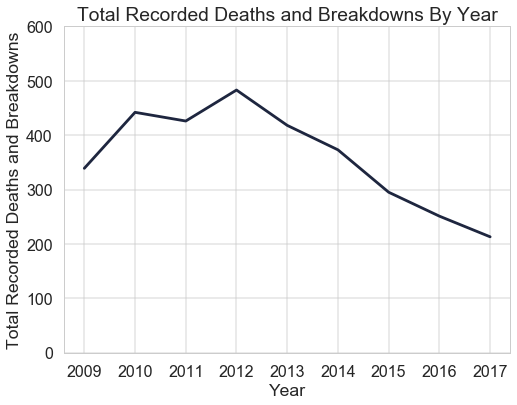

In [1619]:
# build line plot displaying total number of deaths and breakdowns by year
_ = plt.figure(figsize=(8,6))
_ = plt.plot('Year', 'Total', data=year_total)
_ = plt.xlabel('Year')
_ = plt.ylabel('Total Recorded Deaths and Breakdowns')
_ = plt.title('Total Recorded Deaths and Breakdowns By Year')
_ = plt.yticks([0,100,200,300,400,500,600])
_ = plt.grid(alpha=.5)
plt.show()

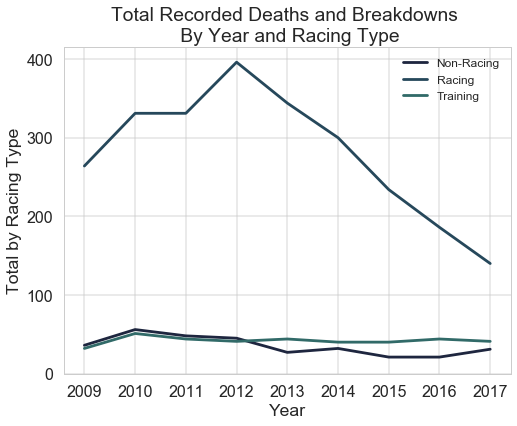

In [1620]:
# RACING TYPE

# create pivot table of how many of each racing type occurred each year
racingtype_pivot = df.pivot_table(values='Incident Date', index='Year', columns='Racing Type Description', aggfunc='count')
# drop the 'Unknown' column since it contains little data
del racingtype_pivot['Unknown']

# plot the above pivot table
_ = plt.figure(figsize=(8,6))
_ = plt.plot(racingtype_pivot)
_ = plt.xlabel('Year')
_ = plt.ylabel('Total by Racing Type')
_ = plt.title('Total Recorded Deaths and Breakdowns \n By Year and Racing Type')
_ = plt.legend(('Non-Racing', 'Racing', 'Training'), fontsize='large')
_ = plt.yticks([0,100,200,300,400])
_ = plt.grid(alpha=.5)
plt.show()

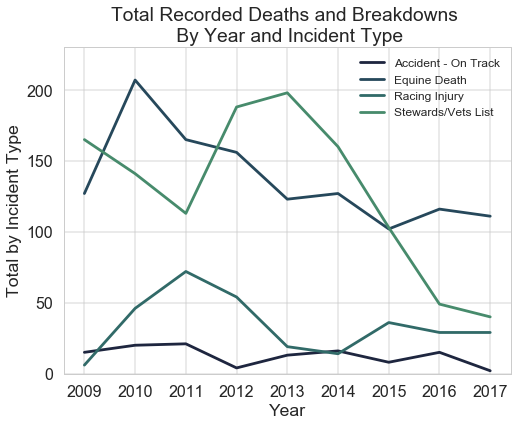

In [1621]:
# INCIDENT TYPE

# create pivot table of how many of each incident type occurred each year
incidenttype_pivot = df.pivot_table(values='Incident Date', index='Year', columns='Incident Type', aggfunc='count')

# remove some less populated columns for more clarity in our graph and discussion
del incidenttype_pivot['ACCIDENT - DRIVER/JOCKEY']
del incidenttype_pivot['ACCIDENT - IN STARTING GATE']
del incidenttype_pivot['ACCIDENT - TAGGED SULKY']
del incidenttype_pivot['DRIVER/JOCKEY INJURED']
del incidenttype_pivot['EQUINE DEATH - INFECTIOUS DISEASE']
del incidenttype_pivot['FALL OF HORSE']
del incidenttype_pivot['FALL OF RIDER']

# plot the above pivot table
_ = plt.figure(figsize=(8,6))
_ = plt.plot(incidenttype_pivot)
_ = plt.xlabel('Year')
_ = plt.ylabel('Total by Incident Type')
_ = plt.title('Total Recorded Deaths and Breakdowns \n By Year and Incident Type')
_ = plt.legend(('Accident - On Track', 'Equine Death', 'Racing Injury', 'Stewards/Vets List'), fontsize='large')
_ = plt.ylim([0,230])
_ = plt.grid(alpha=.5)
plt.show()

## Weather Conditions - Frequency

            index  Count
0          Cloudy    703
1           Sunny    148
2           Clear   1025
3        Overcast     43
4            Rain    120
5            Snow     23
6            Wind     23
7   Thunder Storm      2
8             Hot     38
9           Humid     23
10           Warm     52


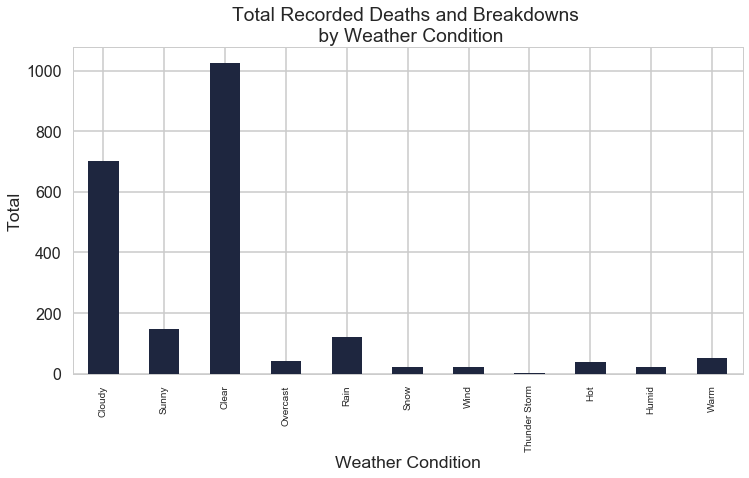

In [1622]:
# create a dataframe of boolean weather columns
weather_bool = df.loc[:,('Cloudy', 'Sunny', 'Clear', 'Overcast', 'Rain', 
                         'Snow', 'Wind', 'Thunder Storm', 'Hot', 'Humid', 'Warm')]

# calculate how many of each weather condition appears in our dataset
weather_count = weather_bool.sum().reset_index(name='Count')
print(weather_count)

# plot weather_count
_ = plt.figure(figsize=(12,6))
_ = weather_count['Count'].plot(kind='bar')
_.set_xlabel('Weather Condition')
_.set_ylabel('Total')
_.set_title('Total Recorded Deaths and Breakdowns \n by Weather Condition')
_.set_xticklabels(weather_count['index'].tolist(), fontsize='medium')
#_ = plt.xticks(rotation=45)
#_.yaxis.grid(True,alpha=.5)
plt.show()

## Trainers and Doping

In [1623]:
# pull records of trainers with a history of doping
doping_trainers = df.loc[df['Doping Trainer'] == 1]

# display the number of unique trainer names in the dataset
print('Number of trainers with a history of doping: ', doping_trainers['Trainer'].nunique())

# display how many horses with incidents each trainer trained
print('Number of horses trained per trainer: ')
print(doping_trainers['Trainer'].value_counts())

Number of trainers with a history of doping:  22
Number of horses trained per trainer: 
RODOLFO (RUDY) RODRIGUEZ    50
GARY C. CONTESSA            46
WILLIAM I. MOTT             17
MIKE J. MAKER               16
STEVEN M. ASMUSSEN          15
RICHARD E. DUTROW JR        12
JAMIE J. NESS                5
SEAN M. CAMPBELL             5
ROY SEDLACEK                 4
ALAN E. GOLDBERG             3
DAWN M. DEVAUX               3
JOSEPH R. CARRUBBA           2
MARC (JOE) J. SHARP          2
MEGAN M. GILMOUR             1
LUIS PENA                    1
JULIE E. MILLER              1
STEPHEN MURCHISON            1
ANTONIO C. AVILA             1
ROBERTINO DIODORO            1
BOB BAFFERT                  1
RONALD J. BURKE              1
PATRICIA FARRO               1
Name: Trainer, dtype: int64


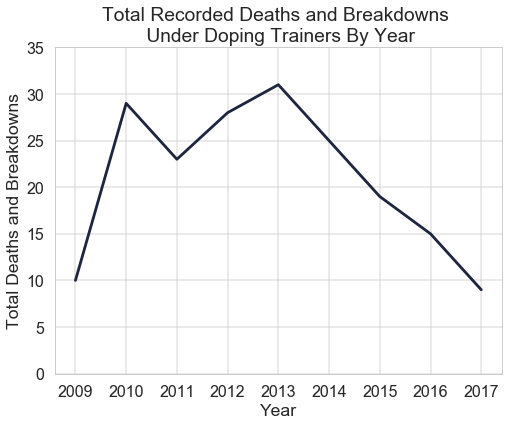

In [1624]:
# calculate how many horses had incidents each year under doping trainers
doped_horses_year = doping_trainers.groupby('Year')['Year'].count().reset_index(name='Count')

# plot the yearly totals of horses that broke down or died for trainers with a history of doping
_ = plt.figure(figsize=(8,6))
_ = plt.plot(doped_horses_year['Year'],doped_horses_year['Count'])
_ = plt.xlabel('Year')
_ = plt.ylabel('Total Deaths and Breakdowns')
_ = plt.title('Total Recorded Deaths and Breakdowns \n Under Doping Trainers By Year')
_ = plt.yticks([0,5,10,15,20,25,30,35])
_ = plt.grid(alpha=.5)
plt.show()

# Inferential Statistics

## Yearly Rates - Total (Doping Trainers and Non-Doping Trainers)

### Hypothesis Test

$H_0$: There is no significant difference in the 2017 death and breakdown rate and the average death and breakdown rate of other years (2009 - 2016)

$H_A$: There is a significant difference in the 2017 death and breakdown rate and the average death and breakdown rate of other years (2009 - 2016)

In [1625]:
# perform t test

# extract yearly totals
year_total = df.groupby('Year')['Year'].count().reset_index(name='Total')
total_rate_2017 = year_total['Total'].values[8]
total_rate_otheryrs = year_total['Total'][:8]
n1 = len(total_rate_otheryrs)

# print some sample statistics
print(year_total['Total'].describe())
print()
print('Total in 2017:', total_rate_2017)
print('Average total in years 2009-2016:', np.mean(total_rate_otheryrs))
print()

# calculate t statistic
t1 = ( np.mean(total_rate_otheryrs) - total_rate_2017 ) / ( np.std(total_rate_otheryrs) / np.sqrt(n1) )
print('t =', round(t1,3))

# perform two sided t test
p_t1 = stats.t.sf(abs(t1), n1-1) * 2
print('p = p( t <= ', -round(t1,3), ') + p( t >= ', abs(round(t1,3)), ') = ', round(p_t1,3))
print('p (unrounded) is ', p_t1)

count      9.000000
mean     360.000000
std       92.126272
min      213.000000
25%      295.000000
50%      373.000000
75%      426.000000
max      483.000000
Name: Total, dtype: float64

Total in 2017: 213
Average total in years 2009-2016: 378.375

t = 6.337
p = p( t <=  -6.337 ) + p( t >=  6.337 ) =  0.0
p (unrounded) is  0.000390091360871


## Yearly Rates - Total (Doping Trainers)

### Hypothesis Test

$H_0$: There is no significant difference in the 2017 death and breakdown rate and the average death and breakdown rate of other years (2009 - 2016) for horses trained by trainers with a history of doping

$H_A$: There is a significant difference in the 2017 death and breakdown rate and the average death and breakdown rate of other years (2009 - 2016) for horses trained by trainers with a history of doping

In [1626]:
# perform t test

# extract yearly totals
doping_trainers = df.loc[pd.notnull(df['Year of Action'])]
doped_year_total = doping_trainers.groupby('Year')['Year'].count().reset_index(name='Total')
doped_total_rate_2017 = doped_year_total['Total'].values[8]
doped_total_rate_otheryrs = doped_year_total['Total'][:8]
n2 = len(doped_total_rate_otheryrs)

# print some sample statistics
print(doped_year_total['Total'].describe())
print()
print('Total under doping trainers in 2017:', doped_total_rate_2017)
print('Average total under doping trainers in years 2009-2016:', np.mean(doped_total_rate_otheryrs))
print()

# calculate t statistic
t2 = ( np.mean(doped_total_rate_otheryrs) - doped_total_rate_2017 ) / ( np.std(doped_total_rate_otheryrs) / np.sqrt(n2) )
print('t =', round(t2,3))

# perform two sided t test
p_t2 = stats.t.sf(abs(t2), 2-1) * 2
print('p = p( t <= ', -round(t2,3), ') + p( t >= ', abs(round(t2,3)), ') = ', round(p_t2,3))
print('p (unrounded) is ', p_t2)

count     9.00000
mean     21.00000
std       8.20061
min       9.00000
25%      15.00000
50%      23.00000
75%      28.00000
max      31.00000
Name: Total, dtype: float64

Total under doping trainers in 2017: 9
Average total under doping trainers in years 2009-2016: 22.5

t = 5.57
p = p( t <=  -5.57 ) + p( t >=  5.57 ) =  0.113
p (unrounded) is  0.113096089343


# Proportion of Incidents Under Doping Trainers to Total Incidents

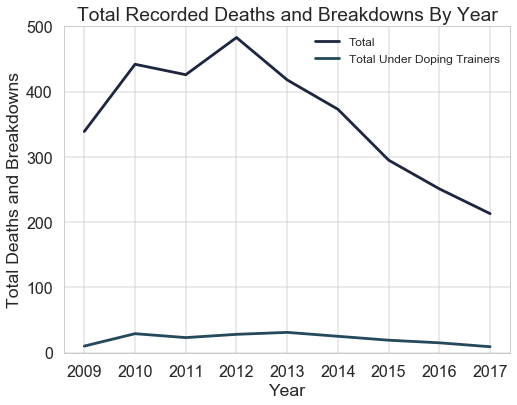

In [1627]:
# plot yearly totals and yearly totals under doping trainers
_ = plt.figure(figsize=(8,6))
_ = plt.plot(year_total['Year'], year_total['Total'])
_ = plt.plot(doped_year_total['Year'], doped_year_total['Total'])
_ = plt.xlabel('Year')
_ = plt.ylabel('Total Deaths and Breakdowns')
_ = plt.title('Total Recorded Deaths and Breakdowns By Year')
_ = plt.legend(('Total', 'Total Under Doping Trainers'), fontsize='large')
_ = plt.ylim([0,500])
_ = plt.grid(alpha=.5)
plt.show()

### Hypothesis Test

$H_0$: There is no significant difference in the 2017 proportion of incidents under doping trainers to total incidents and the average proportion of incidents under doping trainers to total incidents of other years (2009 - 2016)

$H_A$: There is a significant difference in the 2017 proportion of incidents under doping trainers to total incidents and the average proportion of incidents under doping trainers to total incidents of other years (2009 - 2016)

In [1628]:
# perform t test

# calculate and extract yearly proportion totals
doping_proportion = doped_year_total / year_total * 100
doping_proportion['Year'] = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
doping_proportion_2017 = doping_proportion['Total'].values[8]
doping_proportion_otheryrs = doping_proportion['Total'][:8]
n3 = len(total_rate_otheryrs)

# print all yearly proportions
print(doping_proportion)
print()

# print some sample statistics
print(doping_proportion['Total'].describe())
print()
print('Proportion in 2017:', doping_proportion_2017)
print('Average proportion in years 2009-2016:', np.mean(doping_proportion_otheryrs))
print()

# calculate t statistic
t3 = ( np.mean(doping_proportion_otheryrs) - doping_proportion_2017 ) / ( np.std(doping_proportion_otheryrs) / np.sqrt(n3) )
print('t =', round(t3,3))

# perform two sided t test
p_t3 = stats.t.sf(abs(t3), n3-1) * 2
print('p = p( t <= ', -round(t3,3), ') + p( t >= ', abs(round(t3,3)), ') = ', round(p_t3,3))
print('p (unrounded) is ', p_t3)

   Year     Total
0  2009  2.949853
1  2010  6.561086
2  2011  5.399061
3  2012  5.797101
4  2013  7.416268
5  2014  6.702413
6  2015  6.440678
7  2016  5.976096
8  2017  4.225352

count    9.000000
mean     5.718656
std      1.376203
min      2.949853
25%      5.399061
50%      5.976096
75%      6.561086
max      7.416268
Name: Total, dtype: float64

Proportion in 2017: 4.22535211268
Average proportion in years 2009-2016: 5.905319419651566

t = 3.78
p = p( t <=  -3.78 ) + p( t >=  3.78 ) =  0.007
p (unrounded) is  0.00689400099676


# Machine Learning

## Logistic Regression

In [1629]:
# reformat new dataframe with binary variables
df_logreg = df.loc[:,('Year', 'Incident Type', 'Track', 
       'Racing Type Description', 'Division', 'Doping Trainer',  
       'Cloudy', 'Sunny', 'Clear', 'Overcast', 'Rain', 'Snow', 'Wind',
       'Thunder Storm', 'Hot', 'Humid', 'Warm')]

In [1630]:
# TRANSFORM INCIDENT TYPE DATA
# only use data for 'Accident - On Track', 'Equine Death', 'Racing Injury', 'Stewards/Vets List'

# populate 'Incident_AccidentOnTrack' column
# create make_incidenttype_accidentontrack function
def make_incidenttype_accidentontrack(incident):
    if incident == 'Accident - On Track':
        return 1
    else:
        return 0
# apply make_incidenttype_accidentontrack function
df_logreg['Incident_AccidentOnTrack'] = df_logreg['Incident Type'].apply(make_incidenttype_accidentontrack)

# populate 'Incident_EquineDeath' column
# create make_incidenttype_equinedeath function
def make_incidenttype_equinedeath(incident):
    if incident == 'Equine Death':
        return 1
    else:
        return 0
# apply make_incidenttype_equinedeath function
df_logreg['Incident_EquineDeath'] = df_logreg['Incident Type'].apply(make_incidenttype_equinedeath)

# populate 'Incident_RacingInjury' column
# create make_incidenttype_racinginjury function
def make_incidenttype_racinginjury(incident):
    if incident == 'Racing Injury':
        return 1
    else:
        return 0
# apply make_incidenttype_racinginjury function
df_logreg['Incident_RacingInjury'] = df_logreg['Incident Type'].apply(make_incidenttype_racinginjury)

# populate 'Incident_StewardsList' column
# create make_incidenttype_stewardslist function
def make_incidenttype_stewardslist(incident):
    if incident == 'Stewards/Vets List':
        return 1
    else:
        return 0
# apply make_incidenttype_stewardslist function
df_logreg['Incident_StewardsList'] = df_logreg['Incident Type'].apply(make_incidenttype_stewardslist)

# check head of df_logreg dataframe
#df_logreg.head()

In [1631]:
# TRANSFORM TRACK DATA

# populate 'Track_Aqueduct' column
# create make_track_aqueduct function
def make_track_aqueduct(track):
    if track == 'Aqueduct Racetrack (NYRA)':
        return 1
    else:
        return 0
# apply make_track_aqueduct function
df_logreg['Track_Aqueduct'] = df_logreg['Track'].apply(make_track_aqueduct)

# populate 'Track_Batvia' column
# create make_track_batvia function
def make_track_batvia(track):
    if track == 'Batavia Downs':
        return 1
    else:
        return 0
# apply make_track_batvia function
df_logreg['Track_Batvia'] = df_logreg['Track'].apply(make_track_batvia)

# populate 'Track_Belmont' column
# create make_track_belmont function
def make_track_belmont(track):
    if track == 'Belmont Park (NYRA)':
        return 1
    else:
        return 0
# apply make_track_belmont function
df_logreg['Track_Belmont'] = df_logreg['Track'].apply(make_track_belmont)

# populate 'Track_Buffalo' column
# create make_track_buffalo function
def make_track_buffalo(track):
    if track == 'Buffalo Raceway':
        return 1
    else:
        return 0
# apply make_track_buffalo function
df_logreg['Track_Buffalo'] = df_logreg['Track'].apply(make_track_buffalo)

# populate 'Track_Finger' column
# create make_track_finger function
def make_track_finger(track):
    if track == 'Finger Lakes Gaming & Racetrack':
        return 1
    else:
        return 0
# apply make_track_finger function
df_logreg['Track_Finger'] = df_logreg['Track'].apply(make_track_finger)

# populate 'Track_Monticello' column
# create make_track_monticello function
def make_track_monticello(track):
    if track == 'Monticello Raceway & Mighty M Gaming':
        return 1
    else:
        return 0
# apply make_track_monticello function
df_logreg['Track_Monticello'] = df_logreg['Track'].apply(make_track_monticello)

# populate 'Track_SaratogaG' column
# create make_track_saratogag function
def make_track_saratogag(track):
    if track == 'Saratoga Gaming & Raceway':
        return 1
    else:
        return 0
# apply make_track_saratogag function
df_logreg['Track_SaratogaG'] = df_logreg['Track'].apply(make_track_saratogag)

# populate 'Track_SaratogaR' column
# create make_track_saratogar function
def make_track_saratogar(track):
    if track == 'Saratoga Racecourse (NYRA)':
        return 1
    else:
        return 0
# apply make_track_saratogar function
df_logreg['Track_SaratogaR'] = df_logreg['Track'].apply(make_track_saratogar)

# populate 'Track_Tioga' column
# create make_track_tioga function
def make_track_tioga(track):
    if track == 'Tioga Downs':
        return 1
    else:
        return 0
# apply make_track_tioga function
df_logreg['Track_Tioga'] = df_logreg['Track'].apply(make_track_tioga)

# populate 'Track_Vernon' column
# create make_track_vernon function
def make_track_vernon(track):
    if track == 'Vernon Downs':
        return 1
    else:
        return 0
# apply make_track_vernon function
df_logreg['Track_Vernon'] = df_logreg['Track'].apply(make_track_vernon)

# we don't add a column for Yonkers Raceway in order to avoid collinearity

# check head of df_logreg dataframe
#df_logreg.head()

In [1632]:
# TRANSFORM RACING TYPE DESCRIPTION DATA

# populate 'RacingType_NonRacing' column
# create make_racingtype_nonracing function
def make_racingtype_nonracing(racingtype):
    if racingtype == 'Non-Racing':
        return 1
    else:
        return 0
# apply make_racingtype_nonracing function
df_logreg['RacingType_NonRacing'] = df_logreg['Racing Type Description'].apply(make_racingtype_nonracing)

# populate 'RacingType_Racing' column
# create make_racingtype_racing function
def make_racingtype_racing(racingtype):
    if racingtype == 'Racing':
        return 1
    else:
        return 0
# apply make_racingtype_racing function
df_logreg['RacingType_Racing'] = df_logreg['Racing Type Description'].apply(make_racingtype_racing)

# populate 'RacingType_Training' column
# create make_racingtype_training function
def make_racingtype_training(racingtype):
    if racingtype == 'Training':
        return 1
    else:
        return 0
# apply make_racingtype_training function
df_logreg['RacingType_Training'] = df_logreg['Racing Type Description'].apply(make_racingtype_training)

# we don't add a column for Unknown in order to avoid collinearity

# check head of df_logreg dataframe
#df_logreg.head()

In [1633]:
# TRANSFORM DIVISION DATA

# populate 'Division_Thoroughbred' column
# create make_division_thoroughbred function
def make_division_thoroughbred(division):
    if division == 'Thoroughbred':
        return 1
    else:
        return 0
# apply make_division_thoroughbred function
df_logreg['Division_Thoroughbred'] = df_logreg['Division'].apply(make_division_thoroughbred)

# we don't add a column for Harness in order to avoid collinearity

# check head of df_logreg dataframe
df_logreg.head()

,Year,Incident Type,Track,Racing Type Description,Division,Doping Trainer,Cloudy,Sunny,Clear,Overcast,...,Track_Finger,Track_Monticello,Track_SaratogaG,Track_SaratogaR,Track_Tioga,Track_Vernon,RacingType_NonRacing,RacingType_Racing,RacingType_Training,Division_Thoroughbred
0,2009,EQUINE DEATH,Aqueduct Racetrack (NYRA),Racing,Thoroughbred,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2009,ACCIDENT - ON TRACK,Aqueduct Racetrack (NYRA),Racing,Thoroughbred,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2009,ACCIDENT - ON TRACK,Aqueduct Racetrack (NYRA),Racing,Thoroughbred,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2009,ACCIDENT - ON TRACK,Aqueduct Racetrack (NYRA),Racing,Thoroughbred,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,2009,ACCIDENT - ON TRACK,Aqueduct Racetrack (NYRA),Racing,Thoroughbred,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [1634]:
# remove 'Incident Type', 'Track', 'Racing Type Description', and 'Division' columns
df_logreg = df_logreg.drop(['Incident Type', 'Track', 'Racing Type Description', 'Division'], axis=1)

In [1635]:
# check head
print(df_logreg.head())

   Year  Doping Trainer  Cloudy  Sunny  Clear  Overcast  Rain  Snow  Wind  \
0  2009               0       0      0      0         0     0     0     0   
1  2009               0       0      0      0         0     0     0     0   
2  2009               0       0      0      0         0     0     0     0   
3  2009               0       0      0      0         0     0     0     0   
4  2009               0       0      0      0         0     0     0     0   

   Thunder Storm          ...            Track_Finger  Track_Monticello  \
0              0          ...                       0                 0   
1              0          ...                       0                 0   
2              0          ...                       0                 0   
3              0          ...                       0                 0   
4              0          ...                       0                 0   

   Track_SaratogaG  Track_SaratogaR  Track_Tioga  Track_Vernon  \
0                0  

In [1636]:
# check head and columns
df_logreg.columns

Index(['Year', 'Doping Trainer', 'Cloudy', 'Sunny', 'Clear', 'Overcast',
       'Rain', 'Snow', 'Wind', 'Thunder Storm', 'Hot', 'Humid', 'Warm',
       'Incident_AccidentOnTrack', 'Incident_EquineDeath',
       'Incident_RacingInjury', 'Incident_StewardsList', 'Track_Aqueduct',
       'Track_Batvia', 'Track_Belmont', 'Track_Buffalo', 'Track_Finger',
       'Track_Monticello', 'Track_SaratogaG', 'Track_SaratogaR', 'Track_Tioga',
       'Track_Vernon', 'RacingType_NonRacing', 'RacingType_Racing',
       'RacingType_Training', 'Division_Thoroughbred'],
      dtype='object')

In [1637]:
# extract data for logistic regression
y = df_logreg['Doping Trainer']
X = df_logreg[['Track_Aqueduct',
       'Track_Batvia', 'Track_Belmont', 'Track_Buffalo', 'Track_Finger',
       'Track_Monticello', 'Track_SaratogaG', 'Track_SaratogaR', 'Track_Tioga',
       'Track_Vernon', 'RacingType_NonRacing', 'RacingType_Racing',
       'RacingType_Training']]

# also look at X data including weather conditions
X_withweather = df_logreg[['Cloudy', 'Sunny', 'Clear', 'Overcast',
       'Rain', 'Snow', 'Wind', 'Thunder Storm', 'Hot', 'Humid', 'Warm', 'Track_Aqueduct',
       'Track_Batvia', 'Track_Belmont', 'Track_Buffalo', 'Track_Finger',
       'Track_Monticello', 'Track_SaratogaG', 'Track_SaratogaR', 'Track_Tioga',
       'Track_Vernon', 'RacingType_NonRacing', 'RacingType_Racing',
       'RacingType_Training']]

In [1638]:
# run Logit of X
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary())

         Current function value: 0.195673
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         Doping Trainer   No. Observations:                 3240
Model:                          Logit   Df Residuals:                     3227
Method:                           MLE   Df Model:                           12
Date:                Mon, 15 Jan 2018   Pseudo R-squ.:                  0.1200
Time:                        10:41:07   Log-Likelihood:                -633.98
converged:                      False   LL-Null:                       -720.44
                                        LLR p-value:                 1.211e-30
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Track_Aqueduct           0.3619      0.307      1.180      0.238      -0.239       0.963
Track_Batvia           -38.8715   1

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [1639]:
# run Logit with X_withweather
logit_model = sm.Logit(y,X_withweather)
result = logit_model.fit()
print(result.summary())

         Current function value: 0.193244
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         Doping Trainer   No. Observations:                 3240
Model:                          Logit   Df Residuals:                     3216
Method:                           MLE   Df Model:                           23
Date:                Mon, 15 Jan 2018   Pseudo R-squ.:                  0.1309
Time:                        10:41:07   Log-Likelihood:                -626.11
converged:                      False   LL-Null:                       -720.44
                                        LLR p-value:                 5.543e-28
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Cloudy                  -0.4375      0.201     -2.172      0.030      -0.832      -0.043
Sunny                   -0.5685    

/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [1640]:
# calculate odds ratios for statistically significant variables

# Racing Type
print('RacingType_NonRacing:', np.exp(-3.0555), 1 - np.exp(-3.0555))
print('RacingType_Racing:', np.exp(-2.3452), 1 - np.exp(-2.3452))
print('RacingType_Training:', np.exp(-2.3393), 1 - np.exp(-2.3393))
print()

# Track
print('Track_SaratogaG:', np.exp(-3.4532), 1 - np.exp(-3.4532))

RacingType_NonRacing: 0.0470991652993 0.952900834701
RacingType_Racing: 0.0958280346069 0.904171965393
RacingType_Training: 0.096395091183 0.903604908817

Track_SaratogaG: 0.0316442127061 0.968355787294


In [1641]:
X_all = df_logreg[['Cloudy', 'Sunny', 'Clear', 'Overcast',
       'Rain', 'Snow', 'Wind', 'Thunder Storm', 'Hot', 'Humid', 'Warm',
       'Incident_AccidentOnTrack', 'Incident_EquineDeath',
       'Incident_RacingInjury', 'Incident_StewardsList', 'Track_Aqueduct',
       'Track_Batvia', 'Track_Belmont', 'Track_Buffalo', 'Track_Finger',
       'Track_Monticello', 'Track_SaratogaG', 'Track_SaratogaR', 'Track_Tioga',
       'Track_Vernon', 'RacingType_NonRacing', 'RacingType_Racing',
       'RacingType_Training', 'Division_Thoroughbred']]

# run LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=10)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.937


In [1642]:
#y_pred

In [1643]:
#np.matrix(y_test)

In [1644]:
# cross validation
kfold = model_selection.KFold(n_splits=10, random_state=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.944


In [1645]:
results

array([ 0.93832599,  0.94713656,  0.94273128,  0.9339207 ,  0.9339207 ,
        0.94713656,  0.95594714,  0.9339207 ,  0.95132743,  0.95132743])

In [1646]:
# build confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[911   0]
 [ 61   0]]


In [1647]:
# print precision and recall
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       911
          1       0.00      0.00      0.00        61

avg / total       0.88      0.94      0.91       972



/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


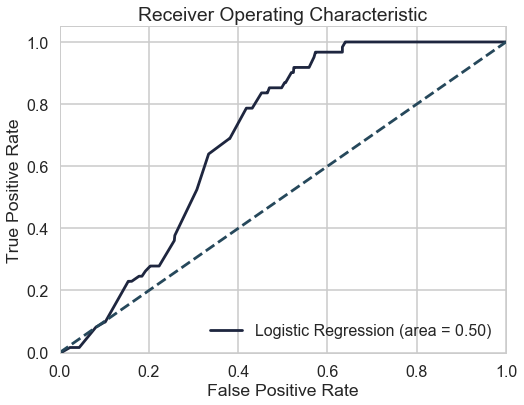

In [1648]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
_ = plt.figure(figsize=(8,6))
_ = plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
_ = plt.plot([0, 1], [0, 1],'--')
_ = plt.xlim([0.0, 1.0])
_ = plt.ylim([0.0, 1.05])
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Receiver Operating Characteristic')
_ = plt.legend(loc="lower right")
plt.show()

## Random Forest

In [1661]:
# run Random Forest classifier with 25 trees
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_all, y, test_size=0.3, random_state=10)
classifier = RandomForestClassifier(n_estimators=25)
classifier.fit(X_train2,y_train2)

y_pred2 = classifier.predict(X_test2)

In [1662]:
#y_pred2

In [1663]:
#np.matrix(y_test2)

In [1664]:
# print precision and recall
print(classification_report(y_test2, y_pred2))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       911
          1       0.00      0.00      0.00        61

avg / total       0.88      0.93      0.90       972



In [1665]:
# display accuracy score
accuracy_score(y_test2, y_pred2)

0.92901234567901236

In [1679]:
# fit an Extra Trees model to the data
model2 = ExtraTreesClassifier()
model2.fit(X_train2, y_train2)

# print importance of each variable
var_importances = {}
for i, j in enumerate(model2.feature_importances_):
    var_importances[X_all.columns[i]] = j

var_importances = sorted(var_importances.items(), key=operator.itemgetter(1), reverse=True)
var_importances

[('Division_Thoroughbred', 0.13121823306103164),
 ('RacingType_Training', 0.12212863450566953),
 ('Track_Finger', 0.10260247269076517),
 ('Track_Aqueduct', 0.091328499753294712),
 ('Cloudy', 0.077461689452325594),
 ('Track_Belmont', 0.067482462864969062),
 ('Clear', 0.063642765198827361),
 ('Sunny', 0.062016349813066828),
 ('RacingType_Racing', 0.054041600241378641),
 ('Rain', 0.043751388292441171),
 ('RacingType_NonRacing', 0.040019149564752284),
 ('Track_SaratogaR', 0.038524988672113791),
 ('Track_Monticello', 0.028281009789073424),
 ('Track_SaratogaG', 0.023819668962615174),
 ('Warm', 0.018340006054240222),
 ('Track_Tioga', 0.011462301687958677),
 ('Track_Vernon', 0.0073829238801771599),
 ('Overcast', 0.0043811652147450614),
 ('Humid', 0.0039114170441193145),
 ('Snow', 0.0038181348274552974),
 ('Track_Batvia', 0.0020133802179477791),
 ('Track_Buffalo', 0.0014466898247672108),
 ('Hot', 0.00062381700493663794),
 ('Wind', 0.00020768484748037323),
 ('Thunder Storm', 9.3566533847934098e-

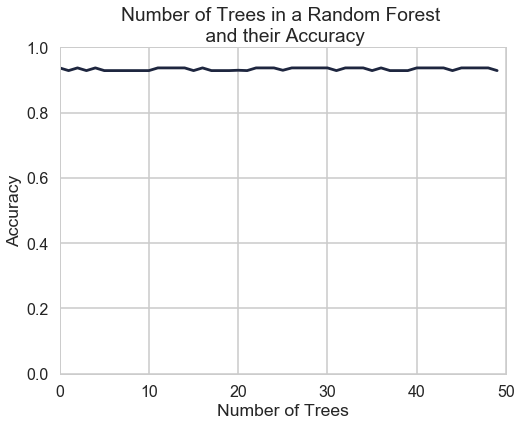

In [1668]:
# test different number of trees, see how it effects accuracy
trees = range(50)
accuracy = np.zeros(50)

for i in range(len(trees)):
    cl = RandomForestClassifier(n_estimators = i + 1)
    cl.fit(X_train2, y_train2)
    y_pred = cl.predict(X_test2)
    accuracy[i] = accuracy_score(y_test2, y_pred)

plt.figure(figsize=[8,6])
plt.plot(trees, accuracy)
plt.xlim([0.0, 50])
plt.ylim([0.0, 1])
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Number of Trees in a Random Forest \n and their Accuracy')
plt.show()